IMPORT DEPENDENCIES

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Set seeds for reproducibility

In [11]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

setting Constants

Directory Path

In [12]:
IMAGE_SIZE = 180
BATCH_SIZE = 50
# Dataset Path
base_dir = 'E:/jupyter notebook/3_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper'

import data into tensorflow

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 4120 files belonging to 2 classes.


In [14]:
class_names = dataset.class_names
class_names

['Bell pepper Bacterial spot', 'Bell pepper Healthy']

In [15]:
class_len = len(class_names)
class_len

2

# DATA VISUALIZATION

In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(50, 180, 180, 3)
[1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 0 1 1]


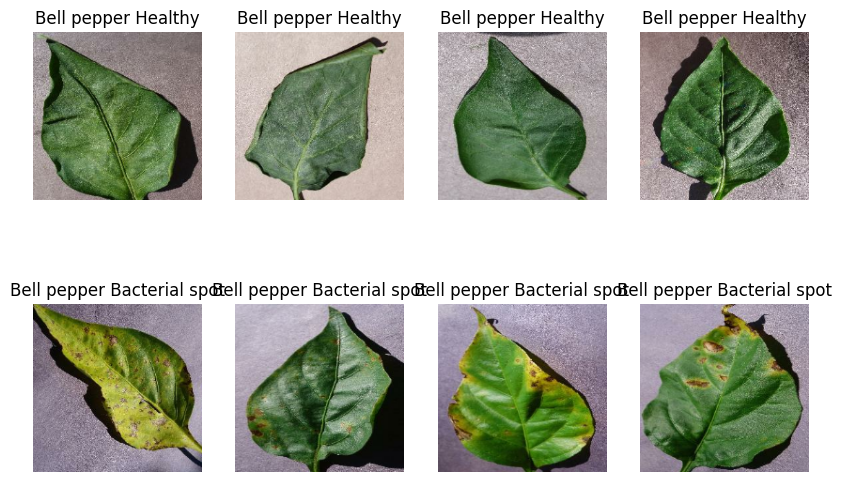

In [17]:
plt.figure(figsize=(10,10))
from numpy import uint16
for image_batch, label_batch in dataset.take(1):
  for i in range(8):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

# TRAIN TEST SPLIT

50 % TRAINING

30 % VALIDATION

10 % TEST

In [18]:
'''
import splitfolders

# Path to the input data folder
input_folder = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper'

# Path to the output folder where split data will be saved
output_folder = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited'

# Define the desired split ratios
split_ratios = (0.5, 0.3, 0.2)  # train, valid, test

# Use split_folders to perform the split
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=split_ratios, group_prefix=None)
'''

"\nimport splitfolders\n\n# Path to the input data folder\ninput_folder = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper'\n\n# Path to the output folder where split data will be saved\noutput_folder = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited'\n\n# Define the desired split ratios\nsplit_ratios = (0.5, 0.3, 0.2)  # train, valid, test\n\n# Use split_folders to perform the split\nsplitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=split_ratios, group_prefix=None)\n"

AUGMENT TRAIN

In [19]:
'''
import os
import cv2
from PIL import Image
import imgaug.augmenters as iaa
import numpy as np
from tqdm import tqdm

# Define your dataset directory
dataset_dir = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/train'
output_dir = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/train_augmented'
# Define augmentation methods
augmentations = [
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Affine(rotate=(-20, 20)),  # random rotations
    iaa.Multiply((0.8, 1.2)),  # random brightness
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # gaussian blur
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # additive gaussian noise
]

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(output_class_dir, exist_ok=True)
    
    # Loop through each image in the class directory
    for filename in tqdm(os.listdir(class_dir), desc=f'Augmenting {class_name}'):
        img_path = os.path.join(class_dir, filename)
        
        # Load image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (imgaug requires RGB images)
        
        # Apply augmentations
        for aug in augmentations:
            augmented_img = aug.augment_image(img)
            
            # Convert augmented image back to BGR for OpenCV and save
            augmented_img_bgr = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)
            output_path = os.path.join(output_class_dir, f'{os.path.splitext(filename)[0]}_{augmentations.index(aug)}.jpg')
            cv2.imwrite(output_path, augmented_img_bgr)

print('Augmentation completed!')
'''

"\nimport os\nimport cv2\nfrom PIL import Image\nimport imgaug.augmenters as iaa\nimport numpy as np\nfrom tqdm import tqdm\n\n# Define your dataset directory\ndataset_dir = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/train'\noutput_dir = 'F:/Jupyter notebook/5_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/train_augmented'\n# Define augmentation methods\naugmentations = [\n    iaa.Fliplr(0.5),  # horizontal flips\n    iaa.Affine(rotate=(-20, 20)),  # random rotations\n    iaa.Multiply((0.8, 1.2)),  # random brightness\n    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # gaussian blur\n    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # additive gaussian noise\n]\n\n# Ensure output directory exists\nos.makedirs(output_dir, exist_ok=True)\n\n# Loop through each class directory\nfor class_name in os.listdir(dataset_dir):\n    class_dir = os.path.join(dataset_dir, class_name)\n    output_class_dir = os.path.join(output_dir, class_name

# Generate

TRAIN

TEST

VALID

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen = ImageDataGenerator(
    rescale=1./255
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    'E:/jupyter notebook/3_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper',
    shuffle = True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4120 images belonging to 2 classes.


In [22]:
valid_generator = train_datagen.flow_from_directory(
    'E:/jupyter notebook/3_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/val',
    shuffle = True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1235 images belonging to 2 classes.


In [23]:
# Test Generator
test_ds = tf.keras.utils.image_dataset_from_directory(
  'E:/jupyter notebook/3_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/test',
  label_mode ='categorical',
  shuffle = False,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE
)

Found 826 files belonging to 2 classes.


Shuffle the test dataset

In [24]:
# Shuffle the dataset
test_ds_shuffled = test_ds.shuffle(buffer_size=1000)

# MODEL ARCHITECTURE

In [25]:
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional layers with Batch Normalization and Dropout
x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.3)(x)

# Flatten layer
x = layers.Flatten()(x)

# Dense layers with Dropout
x = layers.Dense(512, activation='relu')(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer for binary classification
outputs = layers.Dense(class_len, activation='softmax')(x)

# Create the model using Functional API
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Define optimizer with custom learning rate
learning_rate = 0.0001  # Adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      52,429,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,801,154 (201.42 MB)

 Trainable params: 52,801,154 (201.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
EPOCHS = 15
history = model.fit(
  train_generator,
  validation_data = valid_generator,
  epochs = EPOCHS
)

Epoch 1/15


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 615s 7s/step - accuracy: 0.6566 - loss: 0.6691 - val_accuracy: 0.7822 - val_loss: 0.4891
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 716s 9s/step - accuracy: 0.8325 - loss: 0.4003 - val_accuracy: 0.8381 - val_loss: 0.4278
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 717s 9s/step - accuracy: 0.8460 - loss: 0.3714 - val_accuracy: 0.8510 - val_loss: 0.3862
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 713s 9s/step - accuracy: 0.8757 - loss: 0.3254 - val_accuracy: 0.8623 - val_loss: 0.3614
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 646s 8s/step - accuracy: 0.8910 - loss: 0.3050 - val_accuracy: 0.9069 - val_loss: 0.3139
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.8889 - loss: 0.2938 - val_accuracy: 0.9174 - val_loss: 0.3039
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.9056 - loss: 0.2590 - val_accuracy: 0.9271 - val_loss: 0.3019
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.9194 - loss: 0.2325 - val_accuracy: 0.9482 - val_loss: 0.

In [27]:
test_loss, test_accuracy = model.evaluate(test_ds)                                                         
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7963 - loss: 70.7107
Test Loss: 39.7427
Test Accuracy: 0.8898


In [28]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

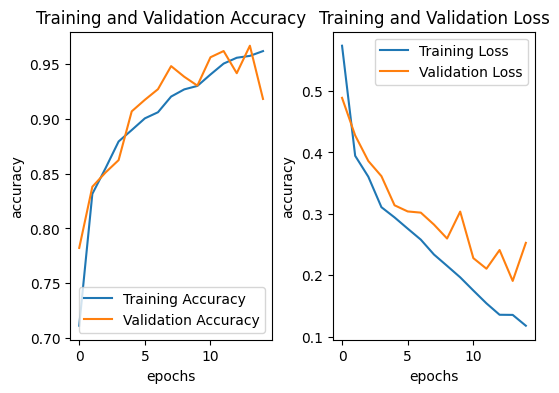

In [29]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Loss')
plt.subplots_adjust(wspace=0.3)
plt.show()

# MAP classes into ARABIC STRUCTURE
PROVIDE THE CURE

In [31]:
class_info = {
    0 : {'name': 'بقع فلفل بكتيريه', 'description': ''' هذا المرض يسببه البكتيريا Xanthomonas campestris pv. vesicatoria. يظهر على أوراق الفلفل بقع داكنة ومائية. البقع تنتشر على سطح الأوراق وتتحول إلى بنية سوداء. المرض ينتشر بسرعة في الظروف الدافئة والرطبة.

علاج بقع الفلفل البكتيرية:

استخدام أصناف مقاومة للمرض عند الزراعة.
الرش بمبيدات بكتيرية مناسبة عند ظهور أول أعراض.
التخلص من بقايا المحصول والأعشاب المصابة.
تحسين التربة وتوفير العناصر الغذائية اللازمة للنبات.
الحفاظ على جفاف النبات بعد الري.
للوقاية من بقع الفلفل البكتيرية:

استخدام أصناف مقاومة للمرض.
الرش الوقائي بمبيدات بكتيرية مناسبة.
التخلص السريع من بقايا المحصول والأعشاب المصابة.
المحافظة على خصوبة التربة وتوفير العناصر الغذائية اللازمة.
ضمان جفاف النبات بعد الري.'''},
    1: {'name': 'فلفل رومي', 'description': 'صحي'},
}

# Building a Predictive System

In [32]:
# Load and preprocess the image using Pillow
from PIL import Image
def load_and_preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    return image_array

# Prediction function
def predict(model, image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    # Resize the image
    image = tf.image.resize(image, (180, 180))
    # Normalize the image
    image = image / 255.0
    # Perform prediction using the model
    predicted_scores = model.predict(np.expand_dims(image, axis=0))  # Expand dimensions to match the input shape
    predicted_class = np.argmax(predicted_scores)
    confidence = np.max(predicted_scores) * 100  # Convert to percentage
    return predicted_class, confidence

In [33]:
class_names = {v: k for k, v in train_generator.class_indices.items()}
class_names

{0: 'Bell pepper Bacterial spot', 1: 'Bell pepper Healthy'}

In [34]:
#image_path = 'PG'
image_path = 'E:/Jupyter notebook/3_plant_Diseased/training/Bell-pepper_diseased/Bell-pepper_splited/test/Bell pepper Bacterial spot/BacterialSpot(2942).JPG'
predicted_class_index, confidence = predict(model, image_path)

# Get the Arabic name and description for the predicted class
arabic_name = class_info[predicted_class_index]['name']
description = class_info[predicted_class_index]['description']

# Print the result
print(f"Predicted Class: {predicted_class_index}")
print(f"Arabic Name: {arabic_name}")
print(f"Description: {description}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: 0
Arabic Name: بقع فلفل بكتيريه
Description:  هذا المرض يسببه البكتيريا Xanthomonas campestris pv. vesicatoria. يظهر على أوراق الفلفل بقع داكنة ومائية. البقع تنتشر على سطح الأوراق وتتحول إلى بنية سوداء. المرض ينتشر بسرعة في الظروف الدافئة والرطبة.

علاج بقع الفلفل البكتيرية:

استخدام أصناف مقاومة للمرض عند الزراعة.
الرش بمبيدات بكتيرية مناسبة عند ظهور أول أعراض.
التخلص من بقايا المحصول والأعشاب المصابة.
تحسين التربة وتوفير العناصر الغذائية اللازمة للنبات.
الحفاظ على جفاف النبات بعد الري.
للوقاية من بقع الفلفل البكتيرية:

استخدام أصناف مقاومة للمرض.
الرش الوقائي بمبيدات بكتيرية مناسبة.
التخلص السريع من بقايا المحصول والأعشاب المصابة.
المحافظة على خصوبة التربة وتوفير العناصر الغذائية اللازمة.
ضمان جفاف النبات بعد الري.
Confidence: 81.91%


# Example Usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 1, Predicted Confidence: 77.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 0, Predicted Confidence: 76.72%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 1, Predicted Confidence: 84.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 0, Predicted Confidence: 74.26%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 1, Predicted Confidence: 63.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy
Predicted Class Index: 1, Predicted Confidence: 93.25%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Actual Class Index: 1, Actual Class: Bell pepper Healthy


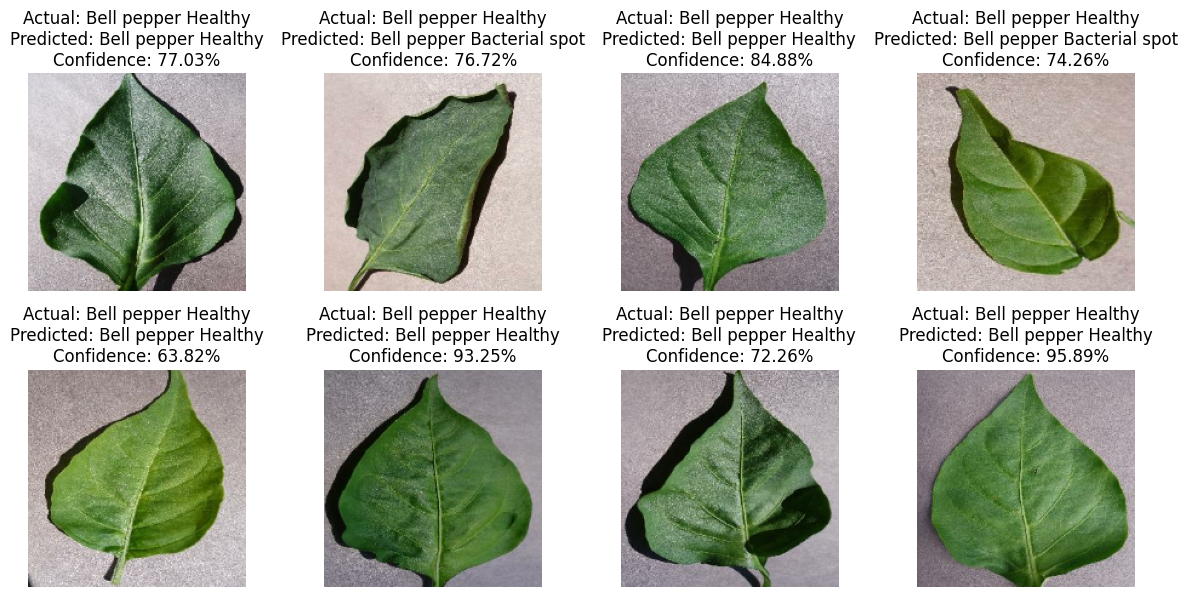

In [35]:
# Set up the figure to display images
import tempfile
plt.figure(figsize=(12, 12))

# Iterate over the first batch of images and labels from the shuffled test dataset
for images, labels in test_ds_shuffled.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        
        # Convert image tensor to numpy array with uint8 data type for visualization
        image_np = images[i].numpy().astype('uint8')
        
        # Save the image as a temporary file
        with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
            image_pil = Image.fromarray(image_np)
            image_pil.save(temp_file.name)
        
        # Display the image
        plt.imshow(image_np)
        
        # Perform prediction using the defined `predict` function
        predicted_class, confidence = predict(model, temp_file.name)
        
        # Extract the actual class index from `labels` tensor
        labels_np = labels[i].numpy()  # Convert label tensor to numpy array
        if isinstance(labels_np, np.ndarray) and labels_np.size > 1:
            actual_class_index = np.argmax(labels_np)  # For one-hot encoded labels
        else:
            actual_class_index = int(labels_np)  # For scalar labels
        
        # Verify that the actual_class_index is within valid range
        if 0 <= actual_class_index < len(class_names):
            actual_class = class_names[actual_class_index]
        else:
            actual_class = f"Unknown Class (Index: {actual_class_index})"
        
        # Print label info and predicted class for debugging
        print(f"Actual Class Index: {actual_class_index}, Actual Class: {actual_class}")
        print(f"Predicted Class Index: {predicted_class}, Predicted Confidence: {confidence:.2f}%")
        
        # Check if predicted_class is within the range of class_names
        if 0 <= predicted_class < len(class_names):
            predicted_label = class_names[predicted_class]
        else:
            predicted_label = f"Unknown Class (Index: {predicted_class})"
        
        # Set the title with formatted text showing actual label, predicted label, and confidence
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")
        
        # Turn off axis for cleaner visualization
        plt.axis("off")

plt.tight_layout()
plt.show()

# SAVE

In [38]:
# Save the entire model as a `.keras` zip archive.
model.save('bell-pepper.keras')
model.save("model_name.h5")

In [37]:
#new_model = tf.keras.models.load_model('potatomodel.keras')
# Show the model architecture
#new_model.summary()